# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch, 
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [ ]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [ ]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [ ]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [ ]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Criação do modelo da rede

In [ ]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [ ]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


tensor([[ 0.0202, -0.0391]])

### Testando o predict da rede

In [ ]:
model(Variable(torch.ones((5,2))))

tensor([[-0.0960],
        [-0.0960],
        [-0.0960],
        [-0.0960],
        [-0.0960]], grad_fn=<MmBackward>)

## Treinamento

### Definindo função de perda e otimizador

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

### Laço de treinamento

In [ ]:
num_epochs = 120
w0_list = []
w1_list = []
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = model(inputs)
    
    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    #loss cálculo da função de perda
    loss = criterion(out, target)
    
    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

Epoch[20/120], loss: 0.025679
Epoch[40/120], loss: 0.022600
Epoch[60/120], loss: 0.021623
Epoch[80/120], loss: 0.021313
Epoch[100/120], loss: 0.021215
Epoch[120/120], loss: 0.021184


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


## Avaliação

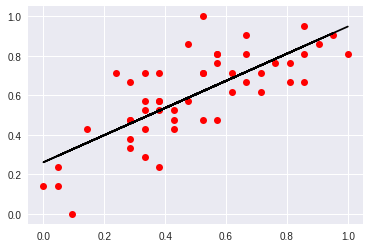

In [ ]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

In [ ]:
y_pred = model(Variable(x_train_bias))
loss = criterion(y_pred, Variable(y_train))
print(loss)

tensor(0.0212, grad_fn=<MseLossBackward>)


# Exercícios

- 1) Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a
   função `criterion` utilizada no laço de treinamento.

- 2) Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para
   mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

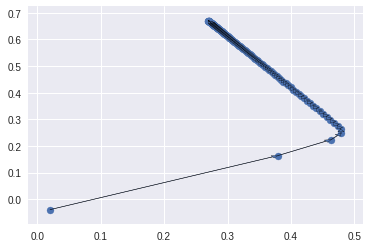

In [ ]:
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

- 3) Procure sobrepor a função de perda neste gráfico. (exercício mais difícil).

# Aprendizados